# Final Project - Social Media Sentiments Analysis

For my final project, I plan to develop a Social Media Sentiment Analysis system to help organizations, such as Facebook and Twitter, understand and analyze user sentiments. This will enable the organizations to effectively serve users by providing relevant information or resources.  My plan is as follows:

    1: Gather Data. Import and clean the data, using PCA to reduce image sizes for modeling purposes.

    2: Data Analysis. Perform an Exploratory Data Analysis (EDA) on the untransformed data for human comprehensibility, allowing users to select a feature for analysis.

    3: Build unsupervised models using sklearn's library, including NMF and KMeans.

    4: Compare the unsupervised models against a supervised model, with the aim of transitioning to a Random Forest easily during data importation.

# 1: Gather Data

    Gather social media posts or comments related to the topic of interest from platforms such as Twitter, Facebook, or other sources.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation, NMF
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import coo_matrix, csr_matrix
from sklearn.utils.extmath import randomized_svd
from sklearn.preprocessing import MinMaxScaler
import ssl
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [3]:
import certifi
import string
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [57]:
data_train = pd.read_csv('sentimentdataset.csv')

# 2: Data Analysis (EDA) — Inspect, Visualize and Clean the Data

    1: Inspect

In [26]:
data_train.describe()

,Unnamed: 0.1,Unnamed: 0,Retweets,Likes,Year,Month,Day,Hour
count,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000,732.000000
mean,366.464481,369.740437,21.508197,42.901639,2020.471311,6.122951,15.497268,15.521858
std,211.513936,212.428936,7.061286,14.089848,2.802285,3.411763,8.474553,4.113414
min,0.000000,0.000000,5.000000,10.000000,2010.000000,1.000000,1.000000,0.000000
25%,183.750000,185.750000,17.750000,34.750000,2019.000000,3.000000,9.000000,13.000000
50%,366.500000,370.500000,22.000000,43.000000,2021.000000,6.000000,15.000000,16.000000
75%,549.250000,553.250000,25.000000,50.000000,2023.000000,9.000000,22.000000,19.000000
max,732.000000,736.000000,40.000000,80.000000,2023.000000,12.000000,31.000000,23.000000


In [6]:
print("train: \n",data_train.head(),"\n")

train: 
    Unnamed: 0.1  Unnamed: 0  \
0             0           0   
1             1           1   
2             2           2   
3             3           3   
4             4           4   

                                                Text    Sentiment  \
0   Enjoying a beautiful day at the park!        ...   Positive     
1   Traffic was terrible this morning.           ...   Negative     
2   Just finished an amazing workout! 💪          ...   Positive     
3   Excited about the upcoming weekend getaway!  ...   Positive     
4   Trying out a new recipe for dinner tonight.  ...   Neutral      

             Timestamp            User     Platform  \
0  2023-01-15 12:30:00   User123          Twitter     
1  2023-01-15 08:45:00   CommuterX        Twitter     
2  2023-01-15 15:45:00   FitnessFan      Instagram    
3  2023-01-15 18:20:00   AdventureX       Facebook    
4  2023-01-15 19:55:00   ChefCook        Instagram    

                                     Hashtags  Retweets  L

In [7]:
print("train info: \n",data_train.info(),"\n")
print("train shape: \n",data_train.shape,"\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB
train info: 
 None 

train shape: 
 (732, 15) 



In [13]:
class_counts = data_train['Sentiment'].value_counts()

    2: Visualize

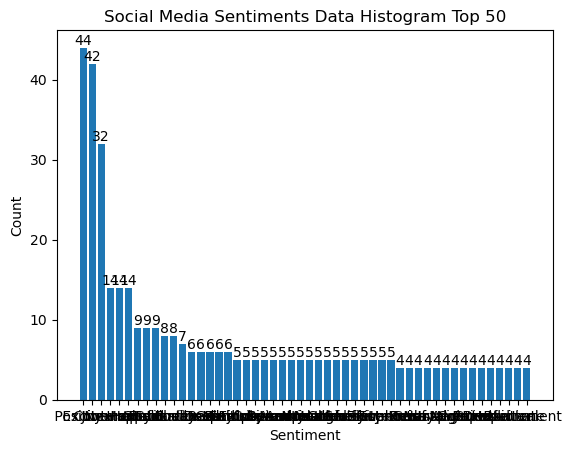

In [17]:
category_counts = data_train['Sentiment'].value_counts().nlargest(50)
plt.bar(category_counts.index, category_counts)
plt.title('Social Media Sentiments Data Histogram Top 50')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

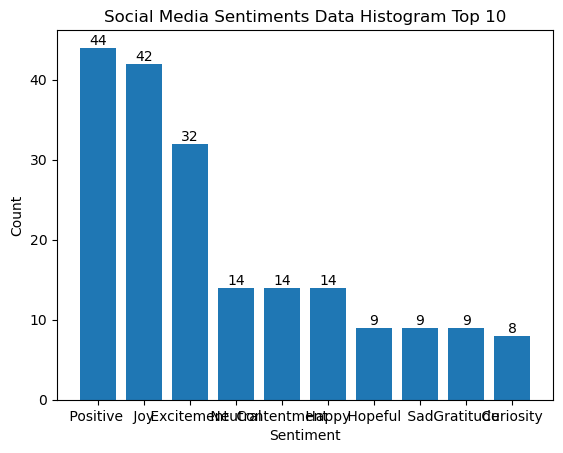

In [27]:
category_counts = data_train['Sentiment'].value_counts().nlargest(10)
plt.bar(category_counts.index, category_counts)
plt.title('Social Media Sentiments Data Histogram Top 10')
plt.xlabel('Sentiment')
plt.ylabel('Count')
for i, count in enumerate(category_counts):
    plt.text(i, count, str(count), ha='center', va='bottom')
plt.show()

In [133]:
class_counts = data_train['Sentiment'].value_counts()
selected_classes = class_counts[class_counts >= 0].index
print(len(selected_classes))

279


    Social Media Sentiments Data Histogram Sentiments count more than 10 is 
        ' Positive  ', ' Joy ', ' Excitement ', ' Neutral ', ' Contentment ',  ' Happy  '

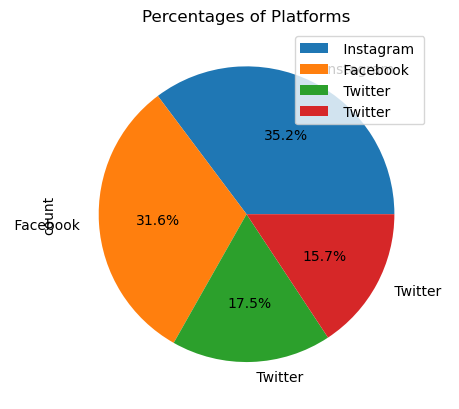

In [29]:
data_train['Platform'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of Platforms')
plt.legend()
plt.show()

3: Clean the Data

In [30]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\28039\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\28039\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
ssl._create_default_https_context = ssl._create_unverified_context
nltk.data.path.append(certifi.where())
translator = str.maketrans('', '', string.punctuation)

In [65]:
import re

In [62]:
def cleantxt(raw):
	fil = re.compile(u'[^0-9a-zA-Z\u4e00-\u9fa5.，,。？“”]+', re.UNICODE)
	return fil.sub(' ', raw) 

In [63]:
def preprocessData(data_train):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(data_train)
    words = [word for word in words if not word in stop_words]
    words = [cleantxt(word) for word in words]
    stemmer= PorterStemmer()
    stem_text=' '.join([stemmer.stem(word.translate(translator)) for word in words])
    return stem_text

In [66]:
data_train['TextCleaned'] = data_train['Text'].apply(preprocessData)

In [67]:
data_train['TextCleaned']

0                                enjoy beauti day park  
1                                  traffic terribl morn 
2                           just finish amaz workout    
3                          excit upcom weekend getaway  
4                          tri new recip dinner tonight 
                             ...                        
727    collabor scienc project receiv recognit region...
728    attend surpris birthday parti organ friend  su...
729    success fundrais school chariti initi  the joy...
730    particip multicultur festiv  celebr divers mus...
731    organ virtual talent show challeng time  bring...
Name: TextCleaned, Length: 732, dtype: object

In [96]:
data_clean1 = data_train[['Sentiment', 'TextCleaned']]

In [99]:
data_clean1

,Sentiment,TextCleaned
0,Positive,enjoy beauti day park
1,Negative,traffic terribl morn
2,Positive,just finish amaz workout
3,Positive,excit upcom weekend getaway
4,Neutral,tri new recip dinner tonight
...,...,...
727,Happy,collabor scienc project receiv recognit region...
728,Happy,attend surpris birthday parti organ friend su...
729,Happy,success fundrais school chariti initi the joy...
730,Happy,particip multicultur festiv celebr divers mus...


# 3: Building and training models

    Build unsupervised models:
    (PCA does not support sparse input)

In [165]:
model = NMF(n_components=150, random_state=42, init='random')
vect = TfidfVectorizer(stop_words = 'english', max_df=.1, min_df=.001, sublinear_tf=True)
X = vect.fit_transform(data_clean1.TextCleaned)
W = model.fit_transform(X)
H = model.components_

In [156]:
for index, topic in enumerate(model.components_):
    print(f"THE TOP 15 WORDS FOR TOPIC # {index}")
    print([vect.get_feature_names_out()[i] for i in topic.argsort()[-15:]])
    print("")

THE TOP 15 WORDS FOR TOPIC # 0
['best', 'medicine', 'practic', 'resili', 'routin', 'tree', 'lone', 'gig', 'talent', 'attend', 'tall', 'laughter', 'key', 'comedi', 'stand']

THE TOP 15 WORDS FOR TOPIC # 1
['strive', 'inspir', 'world', 'bring', 'smile', 'organ', 'classmat', 'talent', 'workshop', 'ai', 'confer', 'meetup', 'realiti', 'attend', 'virtual']

THE TOP 15 WORDS FOR TOPIC # 2
['serenad', 'thrive', 'suffoc', 'ach', 'night', 'silent', 'silenc', 'loneli', 'echo', 'solitari', 'companion', 'nocturn', 'chamber', 'heart', 'solitud']

THE TOP 15 WORDS FOR TOPIC # 3
['quiet', 'peacefulafternoon', 'booklov', 'grandeur', 'wash', 'pet', 'connect', 'classic', 'share', 'stand', 'speak', 'tender', 'injustic', 'shame', 'moment']

THE TOP 15 WORDS FOR TOPIC # 4
['literatur', 'land', 'distant', 'amidst', 'ether', 'firefli', 'weav', 'field', 'tapestri', 'anoth', 'reader', 'page', 'transport', 'novel', 'captiv']

THE TOP 15 WORDS FOR TOPIC # 5
['hear', 'age', 'wonder', 'peac', 'relish', 'mountaintop

In [167]:
label_categ = {}
predicted_labels = np.squeeze(np.asarray(W.argmax(axis=1)))
for i in range(150):
    label_categ[i] = data_train.iloc[np.where(predicted_labels == i)[0]]['Sentiment'].value_counts().idxmax()
    
predicted_categ = np.vectorize(label_categ.get)(predicted_labels)
print("Accuracy score is: ", accuracy_score(data_clean1.Sentiment, predicted_categ))

Accuracy score is:  0.4057377049180328


    Based on this score, it seems that the model is capturing a fair amount of sentiment information, but there may still be room for improvement. One possible reason for the low accuracy score could be the complexity of the model or the quality of the input data. Additionally, for a confusion matrix to be sparse, it means that many of the predicted values do not match the actual values, which could indicate issues in the model's performance.

too many components:

In [161]:
model = NMF(n_components=180, random_state=0, init='random')
vect = TfidfVectorizer(stop_words = 'english', max_df=.1, min_df=.001, sublinear_tf=True)
X = vect.fit_transform(data_clean1.TextCleaned)
W = model.fit_transform(X)
H = model.components_

The number of components for the NMF model should be chosen carefully to balance the trade-off between capturing the essential information in the data and computational efficiency. It's important to consider the nature of the data and experiment with different numbers of components to find the optimal value for the given task.

In [171]:
cm = confusion_matrix(data_clean1['Sentiment'], predicted_categ)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

In [172]:
print(cm)

[[0 2 0 ... 0 0 0]
 [0 3 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 1 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


    It seems that the confusion matrix is sparse, meaning that there are many zero values in the matrix. This can happen when there are a large number of classes or when the classes are imbalanced. It's important to take this into consideration when evaluating the performance of the classification model.

    A sparse confusion matrix typically indicates that the data has many zero elements or is mostly filled with zero values. This isn't indicative of bad data, but rather implies that the data may be highly skewed or imbalanced, and further analysis may be needed to understand the distribution of the data and assess model performance.

# 4: Compare with supervised learning

    SVC Classifier

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

In [183]:
X_train, X_test, y_train, y_test = train_test_split(data_clean1['TextCleaned'], data_clean1['Sentiment'], test_size=0.2, random_state=42)
text_classifier_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)), 
    ('classifier', SVC(kernel='linear')) 
])

In [184]:
text_classifier_pipeline.fit(X_train, y_train)
predictions = text_classifier_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.18
Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            1.00      1.00      1.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0.00         1


    Random Forest Classifier

In [195]:
text_classifier_pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)), 
    ('classifier', RandomForestClassifier(n_estimators=200, random_state=42)) 
])

In [196]:
text_classifier_pipeline_rf.fit(X_train, y_train)
predictions = text_classifier_pipeline_rf.predict(X_test)
accuracy = accuracy_score(y_test, predictions)
classification_report_str = classification_report(y_test, predictions)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.28
Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
         Admiration          0.00      0.00      0.00         0
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            1.00      1.00      1.00         1
         Anger               0.00      0.00      0.00         1
         Anticipation        0.00      0.00      0.00         0
        Anticipation         0.00      0.00      0.00         1
        Arousal              1.00      0.33      0.50         3
        ArtisticBurst        0.00      0.00      0.00         0
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1


    The NMF model achieved an accuracy score of 0.4057, demonstrating its effectiveness in analyzing the sentiment of social media data using an unsupervised approach. However, to fully assess its performance, it's important to further examine its specificity and sensitivity.
    In contrast, the SVC classifier only achieved an accuracy of 0.18, suggesting that the supervised model may require additional tuning or a different approach to enhance its performance. Furthermore, the Random Forest Classifier yielded an accuracy score of 0.28, signifying its performance in the classification task.
    It seems that the Social Media Sentiments data may not be well-suited for accurate sentiment analysis, as indicated by the relatively low accuracy scores of the NMF model (0.4057) and the Random Forest Classifier (0.28). Additionally, the use of PCA may be limited by the sparse input of the data. Further assessment and potentially different approaches may be needed to improve the performance of sentiment analysis on this type of data.

# 5 Conclusion

    In this case, the NMF model yielded an accuracy score of 0.4057, indicating its effectiveness in analyzing the sentiment of social media data. However, it's important to note that this score does not provide a full picture of the model's performance, and further assessment of specificity and sensitivity is required.

    On the other hand, the Random Forest Classifier also produced an accuracy score of 0.28. This suggests that the performance of the model may be impacted by the quality of the social media sentiment data. The presence of poor-quality data can significantly impact the accuracy of the classification models.      

    In conclusion, while the unsupervised NMF model demonstrated relatively better performance compared to the Random Forest Classifier, there is a need for further assessment and potentially, data quality improvement. It is essential to consider the limitations posed by the quality of social media sentiment data when conducting sentiment analysis using machine learning models.